# Logistic regression classifier

In this notebook, we implement logistic regression classifier described in Section 4.3 of the book PRML. 

In [1]:
import time
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#to make this notebook's output stable across runs
np.random.seed(42)

# 1. Setting 

* Let $N \in \mathbb{N}$ be the number of training data points, 
* $d \in \mathbb{N}$ be the dimension of input, 
* $\mathcal{C} = \left\{ 0, 1, \dots, C-1 \right\}$ be the set of class labels, 
* $x_0, x_1, \dots , x_{N-1} \in \mathbb{R}^d$ be the training input data, $y_0, y_1, \dots, y_{N-1} \in \mathcal{C}$ be the training labels, and
$y := (y_0, \dots, y_{N-1})^T \in \mathcal{C}^N$.
* Let $t_n \in \left\{0,1\right\}^{C}$ be the 1-of-$C$ coding of $y_n$, i.e., for $y_n = c$, $t_n$ is a vector with its $c$ th component being 1 and other components being zero. 

# 2. Theory 

## 2.1 Model

We consider the following discriminative model (equation (4.104) in PRML)
$$
\begin{align}
    p(y|x,\theta) = \frac{\exp\left[{\theta^{(y)}}^T \phi(x)\right] }{ \sum_{y'=0}^{C-1} \exp\left[{\theta^{(y')}}^T \phi(x)\right] }
\end{align}
$$
where
* $\phi : \mathbb{R}^d \rightarrow \mathbb{R}^M $, $\phi(x) = (\phi_0(x), \dots, \phi_{M-1}(x))^T$ are basis functions,  
* $\theta^{(y)} \in \mathbb{R}^M$ are weight parameters, and 
* $\theta = \left( {\theta^{(0)}}^T, \dots, {\theta^{(C-1)}}^T  \right)^T \in \mathbb{R}^{CM}$

Later, we use "linear" basis function
$$
\begin{align}
    \phi_j(x) = \begin{cases}
        1 & (j=0)\\
        x^{(j-1)} & (j = 1.\dots, d) 
    \end{cases}
\end{align},
$$
where $x^{(j)}$ represents $j$-th element of $x \in \mathbb{R}^d$


Let $\Phi$ be a $N \times M$ matrix defined by
\begin{equation}
    \Phi = (\Phi_{i,j}), \ \ \Phi_{i,j} = \phi_j(x_i)
\end{equation}

## 2.2 Cost function and its derivatives

### 2.2.1 Cost function

In training a logistic classifier, we select the parameter that minimizes the following cost function (See equations (4.107) and (4.108) in PRML) : 
$$
\begin{align}
    J(\theta) :=  - \frac{1}{N} \sum_{n=0}^{N-1} \sum_{c=0}^{C-1} t_{n,c} \log p_{n,c} + \frac{\lambda}{2N} \| \theta \|^2, 
\end{align}
$$
where 
$$
\begin{align}
    p_{n,c} &:= p(c|x_n,\theta) = \frac{\exp\left[{\theta^{(c)}}^T \phi(x_n)\right] }{ \sum_{c'=0}^{C-1} \exp\left[ {\theta^{(c')}}^T \phi(x_n)  \right]}  \\
    t_{n,c} &:= \delta_{y_n, c}
\end{align}
$$
the first term is negative log likelihood, and the second term is a $l^2$ regularization term.

### 2.2.2 Gradient

To perform the minimization, we need the gradient of the cost function, which is given by (See equation (4.109) in PRML)
$$
\begin{align}
    \frac{\partial J}{\partial \theta^{(c)}_{j}} = 
        \frac{1}{N} \sum_{n=0}^{N-1} ( p_{n,c} -  t_{n,c}) \phi_j(x_n) + \frac{\lambda}{N} \theta^{(c)}_{j}
\end{align}
$$

### 2.2.3 Hessian

Later, we use the second derivative, or Hessian, of the cost function to perform minimization (Newton-Raphson) method. Here, the Hessian is given by (See equation (4.110) in PRML)
$$
\begin{align}
    H_{(c, j), (c', j')} &:= \frac{\partial^2 J}{\partial \theta^{(c)}_{j} \partial \theta^{(c')}_{j'}} \\
    &= \frac{1}{N} \sum_{n=0}^{N-1} p_{n, c} \left( \delta_{c, c'} - p_{n, c'}\right) \Phi_{n, j} \Phi_{n, j'}
    + \frac{\lambda}{N} \delta_{c, c'} \delta_{j, j'} 
\end{align}
$$

## 2.3 Minimization of the cost function

In contrast to the linear regression cases discussed in Chapter 3 of PRML, we now have a cost function which cannot be analytically minimized. Thus, we resort to numerical minimization of the cost function. 

Here we try two methods: gradient descent and Newton-Raphson method. 

### 2.3.1 Gradient Descent

In gradient descent method, we iteratively update our variable in the direction of gradient, i.e., if we denote the function to be minimized by $f$ and its variable by $x$, then in the $n$-th step of iteration, we have
$$
\begin{align}
    x_{n+1} = x_n - \alpha \nabla f(x_n)
\end{align}
$$
where $\alpha > 0$ is learning rate, which should be specified by the user.

### 2.3.2 Newton-Raphson method

In Newton-Raphson algorithm, we utilize the information of second derivative. More specifically, if we denote
* the function to be minimized by $f$, 
* the Hessian of the function by $H$, and
* the variable by $x$, 

then in $n$-th step, we have
$$
\begin{align}
    x_{n+1} = x_{n} - \left[H(x_n)\right]^{-1} \nabla f(x_n)
\end{align}
$$

### 2.3.3 Comparison

Because Newton-Raphson method requires the information of Hessian and inverting it, the computational cost for each iteration is higher than that of gradient descent. 
However, it usually converges much faster than gradient descent in the sense that the number of iteration required is much smaller. Thus, Newton-Raphson method is usually preferred when the dimension of the input (feature) is not too large. 

For detail, see a lecture by Prof. Andrew Ng https://www.youtube.com/watch?v=iwO0JPt59YQ

# 3. From math to code

## 3.1 Matrix representation

Here we express cost function and its gradient using a matrix notation. 
The following matrix will be used:
* $\Phi$ or `Phi` : `(N, M)` array, where `Phi[n, m]` = $\phi_m(x_n)$
* $\Theta$ or `Theta` : `(C, M)` array, where `Theta[c, j]` = $\theta^{(c)}_{j}$
* $T$ or `T` : `(N,C)` array, where `T[n, c]` = $t_{n, c}$
* $P$ or `P` : `(N, C)` array, where `P[n, c]` = $p_{n, c}$

Note that $P$ can be expressed by $\Phi$ and $\Theta$ as 

$$
\begin{align}
    P_{n,c} &= \frac{\exp\left[\sum_{j=0}^{M-1} \theta^{(c)}_{j} \phi_{j}(x_n)\right] }{ \sum_{c'=0}^{C-1} \exp\left[ \sum_{j=0}^{M-1} \theta^{(c')}_{j} \phi_{j}(x_n)  \right]} \\
    &= \frac{ \exp \left[ \left( \Phi \Theta^T \right)_{n, c'} \right]  }{ \sum_{c'=0}^{C-1} \exp\left[ \left( \Phi \Theta^T \right)_{n, c'} \right] }
\end{align}
$$

In [2]:
def calcPhimat(X):
    '''
    This function generates the design matrix Phi from X, the input data
        
    Parameters
    ----------
    X : 2-D numpy array
        (N,d) numpy array, with X[n, i] = i-th element of x_n
            
    Returns
    ----------
    Phi : 2-D numpy array
        The design matrix
    '''
    N = len(X)
    if len(np.shape(X)) == 1:
        d = 1
    else:
        d = np.shape(X)[1]
    Phi = np.zeros((N,d+1))
    Phi[:,0] = np.ones(N)
    Phi[:,1:] = np.reshape(X, (N,d))
    return Phi

def calcTmat(y, C):
    '''
    This function generates the matrix T from the training label y and the number of classes C
    
    Parameters
    ----------
    y : 1-D numpy array
        The elements of y should be integers in [0, C-1]
    C : int
        The number of classes
        
    Returns
    ----------
    T : (len(y), C) numpy array
        T[n, c] = 1 if y[n] == c else 0
    '''
    N = len(y)
    T = np.zeros((N, C))
    for c in range(C):
        T[:, c] = (y == c)
    return T

def calcPmat(Theta, Phi):
    '''
    This function generates the matrix P from the weight Theta and the design matrix Phi
    
    Parameters
    ----------
    Theta : 2-D numpy array
        Matrix representing the weight parameter
    Phi : 2-D numpy array
        The design matrix
        
    Returns
    ----------
    P : 2-D numpy array
    '''
    P = np.exp( Phi @ (Theta.T) )
    P = P/np.reshape( np.sum(P, axis= 1), (len(Phi),1)  ) 
    return P

## 3.2 Cost function and its derivatives

With these definitions, for the cost function, we have
$$
\begin{align}
    J(\Theta) 
        &= - \frac{1}{N} \sum_{n=0}^{N-1} \sum_{c=0}^{C-1} t_{n,c} \log p_{n,c} + \frac{\lambda}{2N} \| \theta \|^2  \\
        &= -\frac{1}{N} sum(T \ast \log P) + \frac{\lambda}{2N} \| \Theta \|_{2}^{2}
\end{align}
$$
where $\log$ means elementwise log, $\ast$ means elementwise product, and, $sum$ means summing up all elements of a matrix. 

In [3]:
def cost_function(thtvec, Phi, T, lam):
    '''
    This function calculate the loss function and its gradient
    
    Parameters
    ----------
    thtvec : 1-D numpy array 
        (M*C,) array, which represents the weight parameter Theta, in flattened form
    Phi : 2-D numpy array
        (N, M) array, design matrix
    T : 2-D numpy array
        (N, C) array, where T[n, c] = 1 if y[n] == c else 0
    lam : float
        The regularization constant
    
    Returns
    ----------
    J : float
        The value of cost function        
    '''
    N, M = np.shape(Phi)
    C = np.shape(T)[1]
    Theta = np.reshape(thtvec, (C, M))
    P = calcPmat(Theta, Phi)
    J = -1.0/N*np.sum(T*np.log(P)) + lam/(2.0*N)*np.linalg.norm(thtvec)**2
    return J

If we regard $\frac{\partial J(\Theta)}{\partial \Theta}$ as a matrix, then the gradient can be written as
$$
\begin{align}
    \frac{\partial J(\Theta)}{\partial \Theta}
    &= \left(  \frac{1}{N} \sum_{n=0}^{N-1} ( p_{n,c} -  t_{n,c}) \phi_j(x_n) + \frac{\lambda}{N} \theta^{(c)}_{j} \right)_{c,j} \\
    &= \frac{1}{N} (P-T)^T \Phi + \frac{\lambda}{N} \Theta. 
\end{align}
$$
Because our (and many other) minimization functions assume that gradient is given as a vector (or 1-D array), we convert the matrix (2-D array) by invoking `np.reshape`. 

In [4]:
def grad_cost_function(thtvec, Phi, T, lam):
    '''
    This function calculates the gradient of the cost function 
    
    Parameters
    ----------
    See the help for cost_function
        
    Returns
    ----------
    grad_vec : 2-D array
        The gradient of the cost function with respect to the weight parameter Theta, in flattened form
    '''
    N, M = np.shape(Phi)
    C = np.shape(T)[1]
    Theta = np.reshape(thtvec, (C, M))
    P = calcPmat(Theta, Phi)
    grad_mat = 1.0/N*((P - T).T) @ Phi + lam/N*Theta
    grad_vec = np.reshape(grad_mat, len(thtvec))
    return grad_vec

Calculating Hessian is more complicated (Recall that our implementation of Newton-Raphson method assumes that Hessian is a matrix, i.e., it is 2-D array. ) . 
Before delving into the calculation, let us recall the analytic expression for the Hessian (We have rewritten indeices here).
$$
\begin{align}
    H_{(i, j), (k, l)} &= \frac{\partial^2 J}{\partial \theta^{(i)}_{j} \partial \theta^{(k)}_{l}} \\
    &= \frac{1}{N} \sum_{n=0}^{N-1} p_{n, i} \left( \delta_{i, k} - p_{n, k}\right) \Phi_{n, j} \Phi_{n, l}
    + \frac{\lambda}{N} \delta_{(i,j), (k,l)}
\end{align}
$$
Frist, we calculate a $(C, M, C, M)$ array corresponding to the first term, i.e., we treat the regularization term later, because it is just a $CM \times CM$ identity matrix.

For doing this, we can make use of numpy broadcasting and `np.einsum`

In [5]:
def hess_cost_function(thtvec, Phi, T, lam):
    '''
    This function calculates the Hessian of the cost function 
    
    Parameters
    ----------
    See the help for cost_function
    
    Returns
    ----------
    H : 2-D array
        The hessian
    '''
    N, M = np.shape(Phi)
    C = np.shape(T)[1]
    Theta = np.reshape(thtvec, (C, M))
    P = calcPmat(Theta, Phi)
    tmparr_A = np.reshape(P, (N, C, 1)) * ( np.reshape(np.identity(C), (1, C, C)) - np.reshape(P, (N, 1, C)) )
    tmparr_B = np.reshape(Phi, (N, M, 1)) * np.reshape(Phi, (N, 1, M)) 
    H_tmp = np.einsum('nik,njl->ijkl', tmparr_A, tmparr_B)/N
    H = np.reshape(H_tmp, (C*M, C*M)) + lam/N*np.identity(C*M)
    return H

## 3.3 Minimization

Here, we use gradient descent and Newton-Raphson method to numerically minimize the cost function. The functions performing these minimization procedures are given below.

In [6]:
def minimize_GD(func, x0, grad, alpha=0.01, maxiter=1e4, ftol=1e-5):
    '''
    This function minimizes the given function using gradient descent method
    
    Parameters
    ----------
    func : callable
        Function to be minimized (real-valued)
    x0 : 1-D array
        Initial value of the variable
    grad : callable
        The gradient of func (returns 1-D array)
    alpha : float
        Learning rate
    maxiter : int
        Maximum number of iteration
    ftol : float
        The threshold for stopping criterion. If the change of the value of function is smaller than this value, the iteration stops.
    
    Returns
    ----------
    result : dictionary
        result['x'] ... variable, result['nit'] ... the number of iteration, result['func']...the value of the function, result['success']... whether the minimization is successful or not
    '''
    x = x0
    nit = 0
    while nit < maxiter:
        xold = x
        x = x - alpha*grad(x)
        nit += 1
        if abs(func(x) - func(xold)) < ftol:
            break
    success = (nit < maxiter)
    return {'x': x, 'nit':nit, 'func':func(x), 'success':success}

def minimize_NR(func, x0, grad, hess, maxiter=1e4, ftol=1e-5):
    '''
    This function minimizes the given function using Newton-Raphson method
    
    Parameters
    ----------
    func : callable
        Function to be minimized (real-valued)
    x0 : 1-D array
        Initial value of the variable
    grad : callable
        The gradient of func (returns 1-D array)
    hess: callable
        The hessian of func (returns 2-D array)
    maxiter : int
        Maximum number of iteration
    ftol : float
        The threshold for stopping criterion. If the change of the value of function is smaller than this value, the iteration stops.
    
    Returns
    ----------
    result : dictionary
        result['x'] ... variable, result['nit'] ... the number of iteration, result['func']...the value of the function, result['success']... whether the minimization is successful or not
    '''
    x = x0
    nit = 0
    while nit < maxiter:
        xold = x
        x = x - np.linalg.solve(hess(x), grad(x))
        nit += 1
        if abs(func(x) - func(xold)) < ftol:
            break
    success = (nit < maxiter)
    return {'x': x, 'nit':nit, 'func':func(x), 'success':success} 

def minimize(func, x0, method, grad, hess=None, alpha=None, maxiter=1e4, ftol=1e-5):
    '''
    This function minimizes the given function using the method speicified by user.
    
    Parameters
    ----------
    func : callable
        Function to be minimized (real-valued)
    x0 : 1-D array
        Initial value of the variable
    method : string
        One of 'GD', 'NR'.
    grad : callable
        The gradient of func (returns 1-D array)
    hess : callable
        The hessian of func (returns 2-D array). Required when method='NR'
    alpha : float
        Learning rate
    maxiter : int
        Maximum number of iteration
    ftol : float
        The threshold for stopping criterion. If the change of the value of function is smaller than this value, the iteration stops.
    
    Returns
    ----------
    result : dictionary
        result['x'] ... variable, result['nit'] ... the number of iteration, result['func']...the value of the function, result['success']... whether the minimization is successful or not
    '''
    if method == 'GD':
        if alpha is None:
            print("Gradient descent needs a learning rate parameter alpha.")
            return
        else:
            return minimize_GD(func, x0, grad, alpha, maxiter, ftol)
    elif method == 'NR':
        if hess is None:
            print("Newton-Raphson methods requires the hessian.")
            return
        else:
            return minimize_NR(func, x0, grad, hess, maxiter, ftol)

## 3.4 Classifier 

In [7]:
class LogisticClf:
    def __init__(self, C, lam):
        self.C = C  # the number of labels
        self.lam = lam #regularization parameter
        self.Theta = None
            
    def fit(self, X, y, method='NR', alpha=None, maxiter=1e4, ftol=1e-5, show_message=False):
        '''
        Parameters
        ----------
        X : 1-D or 2-D numpy array
            (N,) or (N, d) array, representing the training input data
        y : 1-D numpy arra
            (N,) array, representing training labels
        '''
        Phi = calcPhimat(X)
        T = calcTmat(y, self.C)
        N, M = np.shape(Phi)
        
        tht0 = np.zeros(M*self.C)
        time_start = time.time()
        result = minimize(func=lambda x : cost_function(x, Phi, T, self.lam), 
                          x0=tht0, 
                          method=method,
                          grad=lambda x : grad_cost_function(x, Phi, T, self.lam),
                          hess=lambda x : hess_cost_function(x, Phi, T, self.lam),
                          alpha=alpha,
                          maxiter=maxiter,
                          ftol=ftol
                         )
        time_end = time.time()
        if show_message:
            print(result['success'])
            print(f"nit: {result['nit']}")
            print(f"calcualtion time : {time_end - time_start}seconds")
        self.Theta = np.reshape(result['x'], (self.C, M))
        
    def predict_proba(self, X):
        '''
        Parameters
        ----------
        X : 1-D or 2-D numpy array
            (N,) or (N, d) array, representing the training input data
        Returns
        ----------
        proba : 2-D numpy arra
            (len(X), self.C) array, where proba[n, c] represents the probability that the n-th instance belongs to c-th class
        '''
        return calcPmat(self.Theta, calcPhimat(X))
        
    def predict(self, X):
        '''
        Parameters
        ----------
        X : 1-D or 2-D numpy array
            (N,) or (N, d) array, representing the training input data
        Returns
        ----------
        classes : 1-D numpy arra
            (len(X), ) array, where classes[n] represents the predicted class to which the n-th instance belongs
        '''
        tmp = self.predict_proba(X)
        return np.argmax(tmp, axis=1 )

# 4. Experiment

In [8]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## 4.1 Toy data

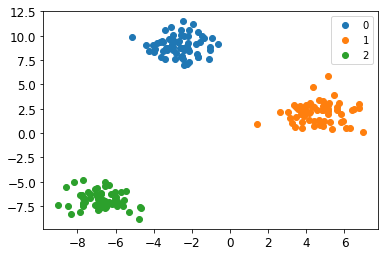

In [9]:
X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=3)
for c in range(3):
    plt.plot(X[:,0][y==c], X[:,1][y==c], 'o', label=f'{c}')
plt.legend()
plt.show()

In [10]:
xx = np.linspace(np.min(X[:,0]), np.max(X[:,0]),101)
yy = np.linspace(np.min(X[:,1]), np.max(X[:,1]),100)
Xtest = np.array([[x,y] for x in xx  for y in yy])
xxx,yyy = np.meshgrid(xx, yy)

def plot_result_blob(clf, C):
    for c in range(C):
        plt.plot(X[:,0][y==c], X[:,1][y==c],"o",label=f"{c}")
    plt.legend()
    pred_val = clf.predict(Xtest)
    pred_val_2D = np.reshape(pred_val, (len(xx), len(yy))).T
    plt.pcolormesh(xxx, yyy, pred_val_2D)
    plt.colorbar()
    plt.show()

Let us solve the problem by gradient descent and Newton-Raphson method.

True
nit: 693
calcualtion time : 0.13400602340698242seconds


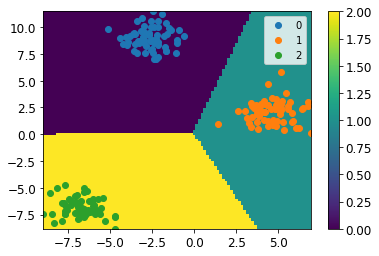

In [11]:
clf = LogisticClf(C = 3, lam = 1.0)
clf.fit(X, y, show_message=True, method='GD', alpha=0.01)
plot_result_blob(clf, 3)

True
nit: 8
calcualtion time : 0.008000612258911133seconds


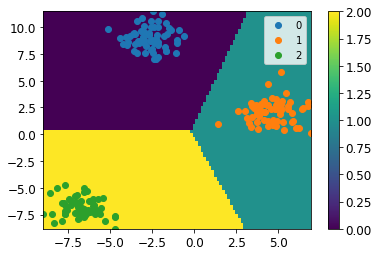

In [12]:
clf = LogisticClf(C = 3, lam = 1.0)
clf.fit(X, y, show_message=True, method='NR')
plot_result_blob(clf, 3)

We can see that data are completely separated, and the decision boundaries are straight, because we employed 'linear' basis functions. 

Moreover, Newton-Raphson method converges much faster compared with gradient descent method in terms of both iteration number and real calculaation time. Note that in this case we only have $MC = 9$, which is small.

## 4.2 Hand-written digits

Let us try out larger data. Here, we use MNIST hand-written digits data.

In [13]:
digits = datasets.load_digits()
dat_train, dat_test, label_train, label_test = train_test_split(digits.data, digits.target, test_size=0.25)

print(f"Training data : {len(dat_train)}")
print(f"Test data : {len(dat_test)}")

Training data : 1347
Test data : 450


In [14]:
def show_result_digit(clf):
    label_test_pred = clf.predict(dat_test)
    print(f"train accuracy score: {accuracy_score(label_train, clf.predict(dat_train))}")
    print(f"test accuracy score: {accuracy_score(label_test, label_test_pred)}")

Let us compare the results for gradient descent and Newton-Raphson method.

In [15]:
clf = LogisticClf(C=10, lam=1.0)
clf.fit(dat_train, label_train, method='GD', alpha=0.01, show_message=True)
show_result_digit(clf)

True
nit: 2104
calcualtion time : 2.6761090755462646seconds
train accuracy score: 0.9977728285077951
test accuracy score: 0.9711111111111111


In [16]:
clf = LogisticClf(C=10, lam=1.0)
clf.fit(dat_train, label_train, method='NR', show_message=True)
show_result_digit(clf)

True
nit: 9
calcualtion time : 24.852784872055054seconds
train accuracy score: 1.0
test accuracy score: 0.9577777777777777


It can be seen that 
* the number of iteration for Newton-Raphson method is much smaller compared with that of gradient descent method, but 
* in terms of the total calculation time, gradient descent method performs better. 

Interestingly, training accuracy does not reach 1.0, because in this case gradient descent terminated before it reaches true minimum.

Below, we can see that, as we increase the regularization parameter, the training score gets worse, while the test score gets better, which is consistent with our intuition that large regularization means large bias and small variance.

In [17]:
lams = [0.1, 1.0, 10.0]

for lam in lams:
    clf = LogisticClf(C=10, lam=lam)
    clf.fit(dat_train, label_train, method='NR', show_message=True)
    print(f"lambda = {lam}")
    show_result_digit(clf)

True
nit: 11
calcualtion time : 28.77142333984375seconds
lambda = 0.1
train accuracy score: 1.0
test accuracy score: 0.9533333333333334
True
nit: 9
calcualtion time : 22.64211106300354seconds
lambda = 1.0
train accuracy score: 1.0
test accuracy score: 0.9577777777777777
True
nit: 8
calcualtion time : 22.95650553703308seconds
lambda = 10.0
train accuracy score: 0.9992576095025983
test accuracy score: 0.9666666666666667


# Appendix scikit-learn

In this appendix, we demonstrate how we can use the scikit-learn library to perform logistic regression.

For detail, see official documentations.

In [18]:
from sklearn.linear_model import LogisticRegression

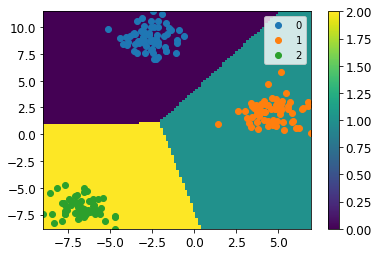

In [19]:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
clf.fit(X, y)
plot_result_blob(clf, 3)

In [20]:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
clf.fit(dat_train, label_train)
show_result_digit(clf)

train accuracy score: 1.0
test accuracy score: 0.9622222222222222
